# Food Delivery Cost and Profitability Analysis

---

### **Food Delivery Cost and Profitability Analysis**

In this task, we will analyze the food delivery operations by examining all associated costs and the profitability per order. This includes reviewing direct expenses such as delivery fees, packaging, and commission fees, as well as indirect expenses like discounts and refunds. We will then juxtapose these costs against the revenue generated through order values and commission fees.

Below are the steps to follow for this analysis:

1. **Data Collection**: Gather data related to food delivery operations from the provided link:  
   [Dataset Link](https://statso.io/wp-content/uploads/2024/02/food_orders_new_delhi.csv)

2. **Data Cleaning**: Clean the dataset for inconsistencies, missing values, or irrelevant information. (5 Marks)

3. **Most Common Payment Method**:
   - Find the most common payment method.
   - What is the proportion of the most common payment method?

4. **95% Confidence Interval**:  
   - Calculate the 95% confidence interval for the proportion of the most common payment method. (Note: The delivery method has been replaced with the payment method.)

5. **Commission Fee**:
   - Determine the average and the median commission fee. (1 Mark)

6. **Order Value**:
   - Find the average order value of the customer. (1 Mark)

7. **Probability of Commission Fee**:
   - i) Probability that the commission fee is more than 120. (2 Marks)
   - ii) Probability that the commission fee is less than 143. (2 Marks)
   - iii) Probability that the commission fee is between 86 and 133. (2 Marks)

8. **Delivery Time for Credit Card Orders**:
   - Find the average delivery time for orders paid by credit card. (2 Marks)

9. **Cash on Delivery**:
   - What is the lowest order value of the top 10% largest orders done by Cash on Delivery? (3 Marks)

10. **Digital Wallet**:
   - What is the highest order value of the bottom 60% least orders done by Digital Wallet? (3 Marks)

11. **Comparison of Mean Values**:
   - By what amount is the mean value of Digital Wallet more or less than that of Cash on Delivery? (3 Marks)

12. **Significance Test on Delivery Time**:
   - The delivery time for any item will take more than 53 minutes. Using a significance level of 0.05, prove or disapprove this claim. (3 Marks)

13. **Delivery Duration Range**:
   - What is the range within which the middle 50% of ordering-delivery durations differ? (3 Marks)

14. **Refunds/Chargebacks Distribution**:
   - Find the distribution of various payment methods whose Refunds/Chargebacks is more than zero. (3 Marks)

---



#### **Step 1: Load the Data**

First, we will import the necessary libraries then load the dataset via the url provided

In [3]:
# import necessary libaries
import pandas as pd # For handling datasets
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns #for statistical data visualization
from scipy import stats #for statistical analysis
import matplotlib.pyplot as plt

In [4]:
# load the dataset
url = "https://statso.io/wp-content/uploads/2024/02/food_orders_new_delhi.csv"
df = pd.read_csv(url)

In [5]:
# display the first few rows of the dataset to understand its structure
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [6]:
# check the shape of the dataset
df.shape

(1000, 12)

In [7]:
#print the concise information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [8]:
#generate descriptive statistics.
df.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [9]:
# check for columns within the dataset
df.columns

Index(['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks'],
      dtype='object')

#### **Step 2: Data Cleaning**

Next, we clean the dataset by checking for missing values, removing irrelevant columns, and handling inconsistencies.

In [10]:
# check for missing values
df.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [11]:
# drop columns that are not needed for the analysis since my task focuses primarily on costs, payment methods, commission, delivery date & time , order date & time, and profitability
df.drop(columns=['Order ID', 'Customer ID', 'Restaurant ID'], inplace=True)

In [12]:
# display first few rows of the new dataset
df.head()

,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [13]:
# check the shape of the dataset
df.shape

(1000, 9)

In [14]:
# fill missing 'Commission Fee' with the mean of the column
df['Commission Fee'] = df['Commission Fee'].fillna(df['Commission Fee'].mean())

In [15]:
# fill missing 'Order Value' with the median of the column
df['Order Value'] = df['Order Value'].fillna(df['Order Value'].median())

In [16]:
# for categorical columns like 'Payment Method', fill with the mode
df['Payment Method'] = df['Payment Method'].fillna(df['Payment Method'].mode()[0])

In [17]:
#handling duplicate records
df[df.duplicated()].shape[0]

0

In [18]:
# droping duplicates
df.drop_duplicates(inplace=True)

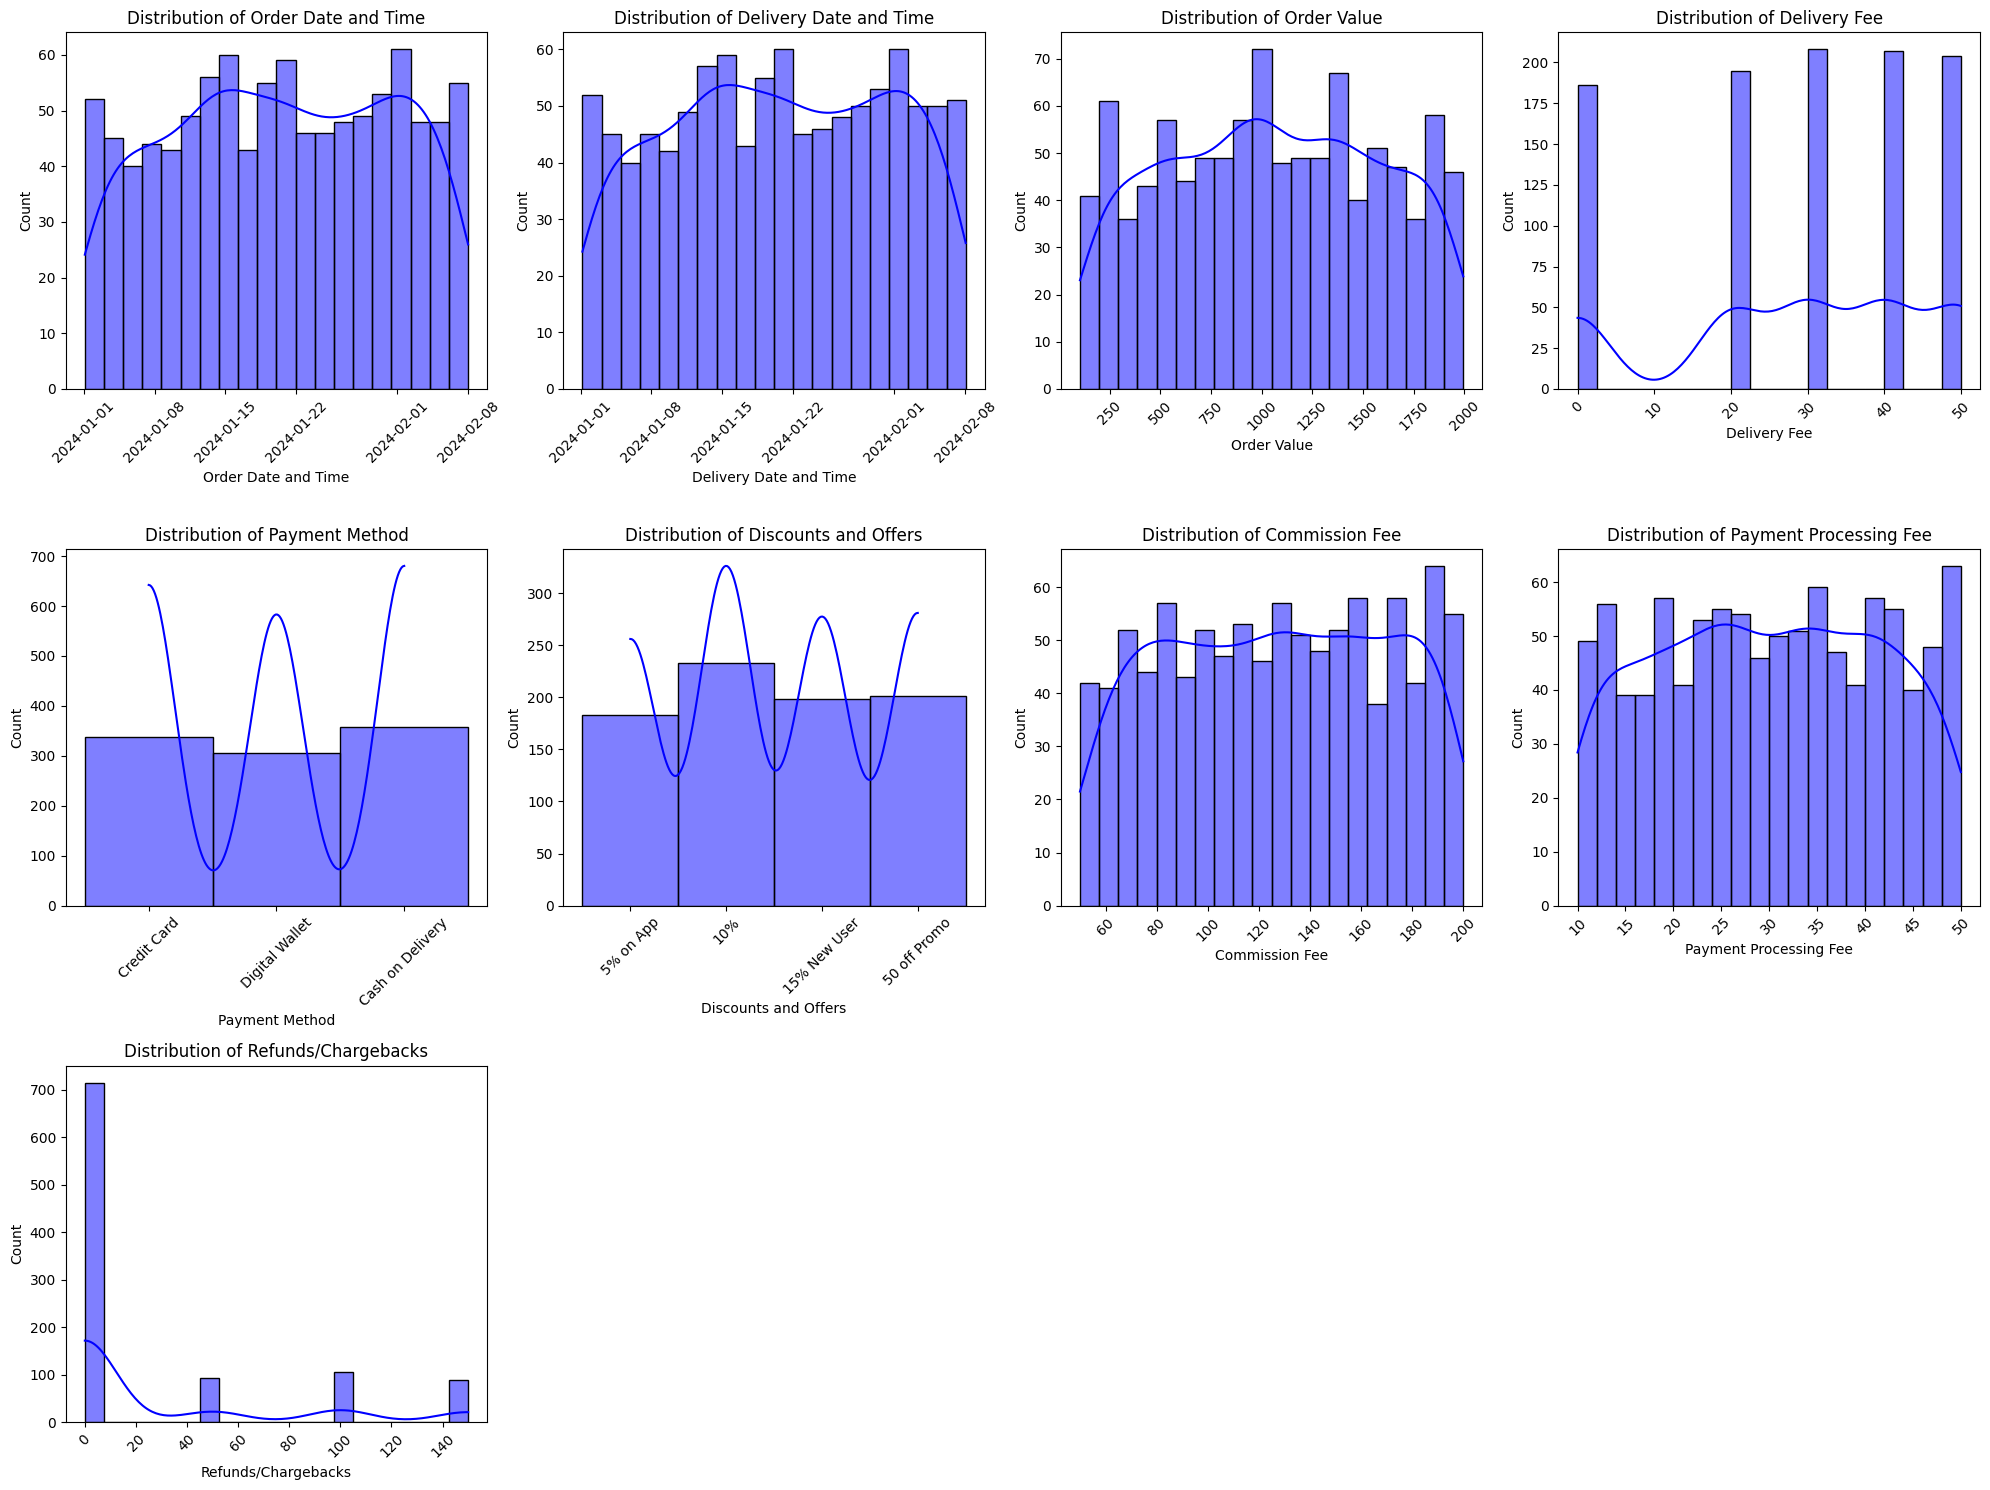

In [42]:
# Create histograms to visualize the distribution of each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude 'target' column
    plt.subplot(3, 4, i)  # Arrange the plots in a grid
    sns.histplot(df[column], kde=True, color="blue", bins=20)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Show the plot
plt.show()

#### **Step 3: Most Common Payment Method**

Identify the most common payment method and its proportion.

In [20]:
# count the frequency of each payment method
payment_method_counts = df['Payment Method'].value_counts().sort_values(ascending=False)
payment_method_counts

Payment Method
Cash on Delivery    357
Credit Card         337
Digital Wallet      306
Name: count, dtype: int64

In [21]:
# find the most common payment method
most_common_payment_method = payment_method_counts.idxmax()

# proportion of the most common payment method
most_common_payment_method_proportion = payment_method_counts.max() / len(df)

print(f"The most common payment method is '{most_common_payment_method}' with a proportion of {most_common_payment_method_proportion:.2f}.")

The most common payment method is 'Cash on Delivery' with a proportion of 0.36.


#### **Step 4: Calculate the 95% Confidence Interval for the Proportion**

Calculate the 95% confidence interval for the proportion of the most common payment method

In [22]:
# compute the 95% confidence interval for the proportion of the most common payment method
proportion = most_common_payment_method_proportion
n = len(df)
z_score = stats.norm.ppf(0.975)  # 95% confidence level

# ctandard error of proportion
se = np.sqrt(proportion * (1 - proportion) / n)

# confidence Interval
conf_interval = (proportion - z_score * se, proportion + z_score * se)
conf_interval

(0.3273047021609623, 0.38669529783903767)

#### **Step 5: Calculate the Average and Median Commission Fee**

Calculate the average and median commission fee.

In [23]:
# calculate the average and median commission fee
avg_commission_fee = df['Commission Fee'].mean()
median_commission_fee = df['Commission Fee'].median()

print(f"The average commission fee is {avg_commission_fee:.2f} and the median commission fee is {median_commission_fee:.2f}.")

The average commission fee is 126.99 and the median commission fee is 127.00.


#### **Step 6: Calculate the Average Order Value**

Find the average order value for customers.

In [24]:
# average order value
avg_order_value = df['Order Value'].mean()
print(f"The average order value is {avg_order_value:.2f}.")

The average order value is 1053.97.


#### **Step 7: Probability Calculations for Commission Fees**

We need to calculate the probability that the commission fee is:
- More than 120
- Less than 143
- Between 86 and 133

In [25]:
# probability that commission fee is more than 120
prob_more_than_120 = (df['Commission Fee'] > 120).mean()

# probability that commission fee is less than 143
prob_less_than_143 = (df['Commission Fee'] < 143).mean()

# probability that commission fee is between 86 and 133
prob_between_86_and_133 = ((df['Commission Fee'] >= 86) & (df['Commission Fee'] <= 133)).mean()

print(f"The probability that the commission fee is more than 120 is {prob_more_than_120:.2f}.")
print(f"The probability that the commission fee is less than 143 is {prob_less_than_143:.2f}.")
print(f"The probability that the commission fee is between 86 and 133 is {prob_between_86_and_133:.2f}.")

The probability that the commission fee is more than 120 is 0.55.
The probability that the commission fee is less than 143 is 0.60.
The probability that the commission fee is between 86 and 133 is 0.32.


#### **Step 8: Average Delivery Time for Orders Paid by Credit Card**

Find the average delivery time for orders paid by credit card.

In [26]:
# convert 'Order Date and Time' and 'Delivery Date and Time' to datetime
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])

# calculate delivery time as the difference between delivery and order times
df['Delivery Time'] = (df['Delivery Date and Time'] - df['Order Date and Time']).dt.total_seconds() / 60  # Convert to minutes

df['Delivery Time'].head()

0    88.0
1    35.0
2    58.0
3    46.0
4    89.0
Name: Delivery Time, dtype: float64

In [27]:
# filter rows where payment method is 'Credit Card'
credit_card_orders = df[df['Payment Method'] == 'Credit Card']

# calculate the average delivery time for these orders
avg_delivery_time_credit_card = credit_card_orders['Delivery Time'].mean()
print(f"The average delivery time for credit card orders is {avg_delivery_time_credit_card:.2f} minutes.")

The average delivery time for credit card orders is 74.01 minutes.


#### **Step 9: Lowest Order Value for the 10% Largest Orders with Cash on Delivery**

Find the lowest order value among the top 10% largest orders done by Cash on Delivery.

In [28]:
df.head()

,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery Time
0,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,88.0
1,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,35.0
2,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,58.0
3,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,46.0
4,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,89.0


In [29]:
# filter rows where payment method is 'Cash on delivery'
cash_on_delivery_orders = df[df['Payment Method'] == 'Cash on Delivery']
cash_on_delivery_orders.head()

,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery Time
2,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,58.0
3,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,46.0
4,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,89.0
5,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,51.0
8,2024-01-02 18:29:59,2024-01-02 20:23:59,1663,40,Cash on Delivery,5% on App,116,48,0,114.0


In [30]:
# sort orders by order value in descending order and select the top 10%
top_10_percent_cash_on_delivery = cash_on_delivery_orders.nlargest(int(len(cash_on_delivery_orders) * 0.1), 'Order Value')
top_10_percent_cash_on_delivery.head()

,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery Time
632,2024-01-03 13:09:29,2024-01-03 15:05:29,1995,20,Cash on Delivery,NaN,75,14,0,116.0
892,2024-01-13 14:57:48,2024-01-13 16:14:48,1995,30,Cash on Delivery,15% New User,52,12,100,77.0
4,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,89.0
573,2024-01-27 12:21:10,2024-01-27 12:58:10,1976,40,Cash on Delivery,10%,120,31,0,37.0
540,2024-01-23 20:39:14,2024-01-23 22:27:14,1966,0,Cash on Delivery,15% New User,109,12,0,108.0


In [31]:
# find the lowest order value in this top 10%
lowest_order_value_top_10 = top_10_percent_cash_on_delivery['Order Value'].min()
print(f"The lowest order value in the top 10% of cash on delivery orders is {lowest_order_value_top_10:.2f}.")

The lowest order value in the top 10% of cash on delivery orders is 1810.00.


#### **Step 10: Highest Order Value for the 60% Least Orders with Digital Wallet**

Find the highest order value among the 60% least orders with Digital Wallet.

In [32]:
# filter rows where payment method is 'Digital Wallet'
digital_wallet_orders = df[df['Payment Method'] == 'Digital Wallet']
digital_wallet_orders.head()

,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery Time
1,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,35.0
6,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50,53.0
9,2024-01-05 00:50:19,2024-01-05 02:10:19,491,40,Digital Wallet,10%,189,10,0,80.0
13,2024-02-04 18:48:54,2024-02-04 20:28:54,633,30,Digital Wallet,15% New User,51,14,50,100.0
15,2024-01-15 20:46:22,2024-01-15 21:54:22,992,0,Digital Wallet,15% New User,200,28,0,68.0


In [33]:
# sort orders by order value in ascending order and select the bottom 60%
bottom_60_percent_digital_wallet = digital_wallet_orders.nsmallest(int(len(digital_wallet_orders) * 0.6), 'Order Value')
bottom_60_percent_digital_wallet.head()

,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery Time
967,2024-01-30 06:03:39,2024-01-30 06:36:39,105,0,Digital Wallet,15% New User,143,18,0,33.0
318,2024-01-14 23:14:21,2024-01-15 00:27:21,110,0,Digital Wallet,15% New User,186,37,50,73.0
774,2024-01-04 16:17:55,2024-01-04 18:04:55,129,20,Digital Wallet,50 off Promo,172,27,0,107.0
417,2024-01-08 17:45:55,2024-01-08 18:46:55,152,50,Digital Wallet,15% New User,64,39,100,61.0
99,2024-01-20 10:18:07,2024-01-20 10:51:07,167,50,Digital Wallet,NaN,168,28,0,33.0


In [34]:
# find the highest order value in this bottom 60%
highest_order_value_bottom_60 = bottom_60_percent_digital_wallet['Order Value'].max()
print(f'The highest order value in this bottom 60% is {highest_order_value_bottom_60:.2f}.')

The highest order value in this bottom 60% is 1186.00.


#### **Step 11: Compare Mean Order Values for Digital Wallet vs Cash on Delivery**

Find the difference in the mean order value between Digital Wallet and Cash on Delivery.

In [35]:
# find the mean order value for Digital Wallet and Cash on Delivery
mean_order_value_digital_wallet = digital_wallet_orders['Order Value'].mean()
mean_order_value_cash_on_delivery = cash_on_delivery_orders['Order Value'].mean()

# calculate the difference in mean order values
mean_difference = mean_order_value_digital_wallet - mean_order_value_cash_on_delivery
print(f"The difference in mean order values between Digital Wallet and Cash on Delivery is {mean_difference:.2f}.")

The difference in mean order values between Digital Wallet and Cash on Delivery is -9.98.


#### **Step 12: Test Hypothesis for Delivery Time > 53 Minutes**

Test if the average delivery time is more than 53 minutes with a significance level of 0.05.

In [36]:
# one-sample t-test for delivery time > 53 minutes
t_stat, p_value = stats.ttest_1samp(df['Delivery Time'], 53)
alpha = 0.05

# ff p-value is less than alpha, we reject the null hypothesis
reject_null = p_value / 2 < alpha and t_stat > 0
print(f"Null hypothesis {'rejected' if reject_null else 'not rejected'}.")

Null hypothesis rejected.


#### **Step 13: Range for the Middle 50% of Delivery Durations**

Calculate the interquartile range (IQR) for the delivery durations.

In [37]:
# calculate the IQR for delivery time
Q1 = df['Delivery Time'].quantile(0.25)
Q3 = df['Delivery Time'].quantile(0.75)
IQR = Q3 - Q1

print(f"The interquartile range for delivery time is {IQR:.2f} minutes.")

The interquartile range for delivery time is 46.00 minutes.


#### **Step 14: Distribution of Payment Methods with Refunds/Chargebacks**

Find the distribution of payment methods with refunds/chargebacks greater than zero.

In [38]:
df.head()

,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery Time
0,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,88.0
1,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,35.0
2,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,58.0
3,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,46.0
4,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,89.0


In [39]:
# filter orders with refunds/chargebacks greater than zero
refunds_orders = df[df['Refunds/Chargebacks'] > 0]

# count the distribution of payment methods for these orders
refund_payment_distribution = refunds_orders['Payment Method'].value_counts()

refund_payment_distribution

Payment Method
Credit Card         102
Cash on Delivery    101
Digital Wallet       82
Name: count, dtype: int64